In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

### Change Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df['Region_Code'] = df['Region_Code'].astype(str)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(str)


In [6]:
nums = ['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage', 'Response']
cats = ['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

### Feature Transformation

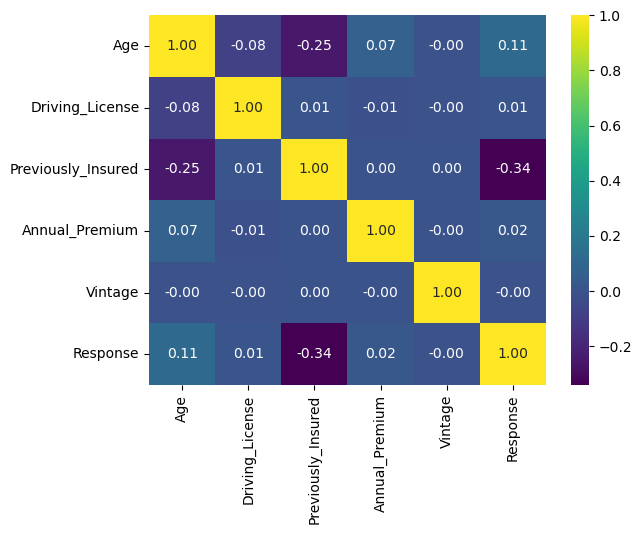

In [7]:
sns.heatmap(df[nums].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df[['Age_norm']]

,Age_norm
0,0.369231
1,0.861538
2,0.415385
3,0.015385
4,0.138462
...,...
381104,0.830769
381105,0.153846
381106,0.015385
381107,0.738462


In [9]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_norm
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.369231
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.861538
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.415385
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.015385
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.138462


### Feature Encoding

Label Encoding

In [10]:
df[cats].describe()

,Gender,Region_Code,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
count,381109,381109,381109,381109,381109
unique,2,53,3,2,155
top,Male,28.0,1-2 Year,Yes,152.0
freq,206089,106415,200316,192413,134784


In [11]:
mapping_gender = {
     'Male' : 0,
     'Female' : 1
}

mapping_vehicle_age = {
     '< 1 Year' : 0,
     '1-2 Year' : 1,
     '> 2 Years' : 2
}

mapping_vehicle_damage = {
     'No' : 0,
     'Yes' : 1
}

df['Gender_Num'] = df['Gender'].map(mapping_gender)
df['Vehicle_Age_Num'] = df['Vehicle_Age'].map(mapping_vehicle_age)
df['Vehicle_Damage_Num'] = df['Vehicle_Damage'].map(mapping_vehicle_damage)

In [12]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_norm,Gender_Num,Vehicle_Age_Num,Vehicle_Damage_Num
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.369231,0,2,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.861538,0,1,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.415385,0,2,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.015385,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.138462,1,0,0


In [13]:
top_region_code = df.groupby('Region_Code')['id'].count().reset_index()
top_region_code['Region_Code'] = np.where(top_region_code['id'] < 19000, 'Others', top_region_code['Region_Code'])
top_region_code = top_region_code.sort_values(by='id', ascending=False)


In [14]:
top_region_code.head()

,Region_Code,id
21,28.0,106415
51,8.0,33877
41,46.0,19749
36,Others,18263
7,Others,13308


In [15]:
top_region_code2 = top_region_code.groupby('Region_Code')['id'].sum().reset_index()
top_region_code2.head()

,Region_Code,id
0,28.0,106415
1,46.0,19749
2,8.0,33877
3,Others,221068


In [16]:
top_sales_channel = df.groupby('Policy_Sales_Channel')['id'].count().reset_index()
top_sales_channel = top_sales_channel.sort_values(by='id', ascending=False)
top_sales_channel.head()

,Policy_Sales_Channel,id
57,152.0,134784
78,26.0,79700
28,124.0,73995
66,160.0,21779
61,156.0,10661


In [17]:
top_sales_channel['Policy_Sales_Channel'] = np.where(top_sales_channel['id']<70000, 'Others', top_sales_channel['Policy_Sales_Channel'])
top_sales_channel.head(6)

,Policy_Sales_Channel,id
57,152.0,134784
78,26.0,79700
28,124.0,73995
66,Others,21779
61,Others,10661
26,Others,9930


In [18]:
top_sales_channel2 = top_sales_channel.groupby('Policy_Sales_Channel')['id'].sum().reset_index()
top_sales_channel2.sort_values(by='id', ascending=False)

,Policy_Sales_Channel,id
1,152.0,134784
3,Others,92630
2,26.0,79700
0,124.0,73995


Region_Code dan Policy_Sales_Channel tidak dilakukan encoding karena nilai unique terlalu banyak.

In [19]:
# menambahkan fitur hasil encoding ke variabel nums
nums = ['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage', 'Gender_Num', 'Vehicle_Age_Num', 'Vehicle_Damage_Num', 'Response']

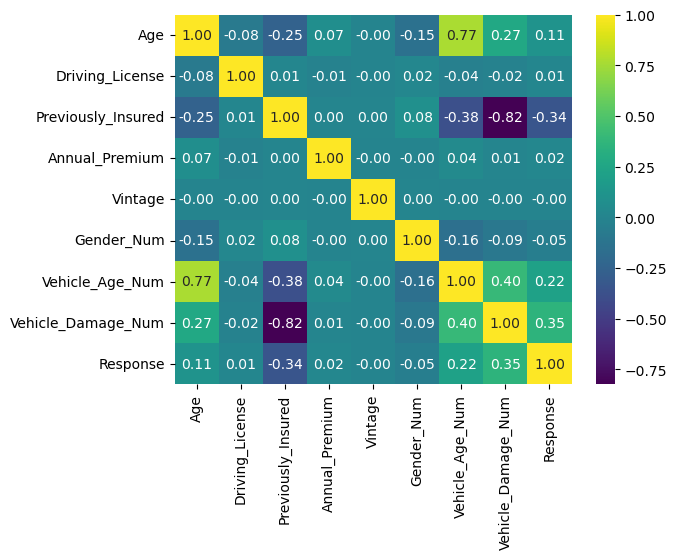

In [20]:
sns.heatmap(df[nums].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

Apa perlu didrop yang terjadi multikolinearitas?

### Class Imbalance

In [21]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [22]:
# Memisahkan antara feature dan target
X = df.drop(columns=['Response'])
y = df[['Response']]

print(X.shape)
print(y.shape)

(381109, 15)
(381109, 1)


In [23]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = ros.fit_resample(X, y)

In [24]:
y_over.value_counts()

Response
0           334399
1           334399
Name: count, dtype: int64

In [26]:
df['Response'] = df.pop('Response')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_norm,Gender_Num,Vehicle_Age_Num,Vehicle_Damage_Num,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,0.369231,0,2,1,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.861538,0,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,0.415385,0,2,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.015385,0,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.138462,1,0,0,0
